## Step 1: Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Could not save font_manager cache [Errno 13] Permission denied: 'C:\\Users\\nisha\\.matplotlib\\fontlist-v390.json.matplotlib-lock'


In [2]:
# Inorder to get clear output its better if we supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
maternal = pd.read_csv("maternal_data.csv")

In [4]:
maternal.head()

,age,bmi,blood_pressure,bp_high,bp_low,gestational_age,previous_c_section,previous_miscarriages,previous_preterm_birth,chronic_hypertension,...,gestational_diabetes,preeclampsia_history,multiple_pregnancy,smoking,alcohol_use,family_history,hb_level,urine_protein,blood_glucose,risk_level
0,43,25.8,121/93,121,93,22,0,0,0,1,...,0,0,0,0,1,0,10.0,5.8,74.0,high
1,29,19.6,136/80,136,80,24,1,2,0,0,...,0,0,0,0,0,0,12.7,42.2,96.1,moderate
2,22,19.8,139/82,139,82,30,0,0,0,1,...,1,0,1,0,0,0,12.2,17.9,77.6,high
3,35,27.7,90/63,90,63,8,0,0,0,0,...,0,0,0,1,0,0,11.2,15.7,65.1,high
4,33,22.5,128/75,128,75,19,0,2,0,0,...,0,0,0,0,0,0,12.4,11.3,60.0,moderate


In [5]:
maternal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76645 entries, 0 to 76644
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     76645 non-null  int64  
 1   bmi                     76645 non-null  float64
 2   blood_pressure          76645 non-null  object 
 3   bp_high                 76645 non-null  int64  
 4   bp_low                  76645 non-null  int64  
 5   gestational_age         76645 non-null  int64  
 6   previous_c_section      76645 non-null  int64  
 7   previous_miscarriages   76645 non-null  int64  
 8   previous_preterm_birth  76645 non-null  int64  
 9   chronic_hypertension    76645 non-null  int64  
 10  diabetes                76645 non-null  int64  
 11  gestational_diabetes    76645 non-null  int64  
 12  preeclampsia_history    76645 non-null  int64  
 13  multiple_pregnancy      76645 non-null  int64  
 14  smoking                 76645 non-null

In [6]:
maternal.shape

(76645, 21)

####  The dataset was successfully loaded, containing 76,645 records and 21 columns.

In [7]:
# Checking for missing values
maternal.isnull().sum()

age                       0
bmi                       0
blood_pressure            0
bp_high                   0
bp_low                    0
gestational_age           0
previous_c_section        0
previous_miscarriages     0
previous_preterm_birth    0
chronic_hypertension      0
diabetes                  0
gestational_diabetes      0
preeclampsia_history      0
multiple_pregnancy        0
smoking                   0
alcohol_use               0
family_history            0
hb_level                  0
urine_protein             0
blood_glucose             0
risk_level                0
dtype: int64

#### There are no missing values

In [8]:
# Check for duplicates
duplicates = maternal.duplicated().sum()

In [9]:
duplicates

np.int64(0)

#### There are 0 duplicates found 

In [10]:
# Unique values in 'risk_level'
risk_counts = maternal['risk_level'].value_counts()
risk_counts

risk_level
moderate    49456
high        21376
low          5813
Name: count, dtype: int64

#### The analysis of the risk_level target variable showed an imbalanced distribution: moderate risk is the most common category, followed by high, and then low. 

In [11]:
# Basic description of numerical features
desc = maternal.describe()
desc

,age,bmi,bp_high,bp_low,gestational_age,previous_c_section,previous_miscarriages,previous_preterm_birth,chronic_hypertension,diabetes,gestational_diabetes,preeclampsia_history,multiple_pregnancy,smoking,alcohol_use,family_history,hb_level,urine_protein,blood_glucose
count,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000,76645.000000
mean,32.028547,27.048081,119.649540,79.572262,22.550577,0.199582,0.501246,0.100137,0.082236,0.049605,0.099145,0.019427,0.031065,0.150329,0.100842,0.201070,11.499074,20.030401,85.328138
std,10.067341,5.878066,14.708854,9.741057,10.957337,0.399689,0.708537,0.300185,0.274726,0.217130,0.298859,0.138022,0.173495,0.357396,0.301121,0.400803,1.494201,20.098933,14.379280
min,15.000000,15.000000,90.000000,60.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.400000,0.000000,60.000000
25%,23.000000,23.000000,109.000000,73.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.500000,5.800000,74.900000
50%,32.000000,27.000000,119.000000,79.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.500000,13.800000,85.100000
75%,41.000000,31.000000,130.000000,86.000000,32.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.500000,27.700000,95.200000
max,49.000000,50.000000,184.000000,126.000000,41.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,249.700000,145.700000


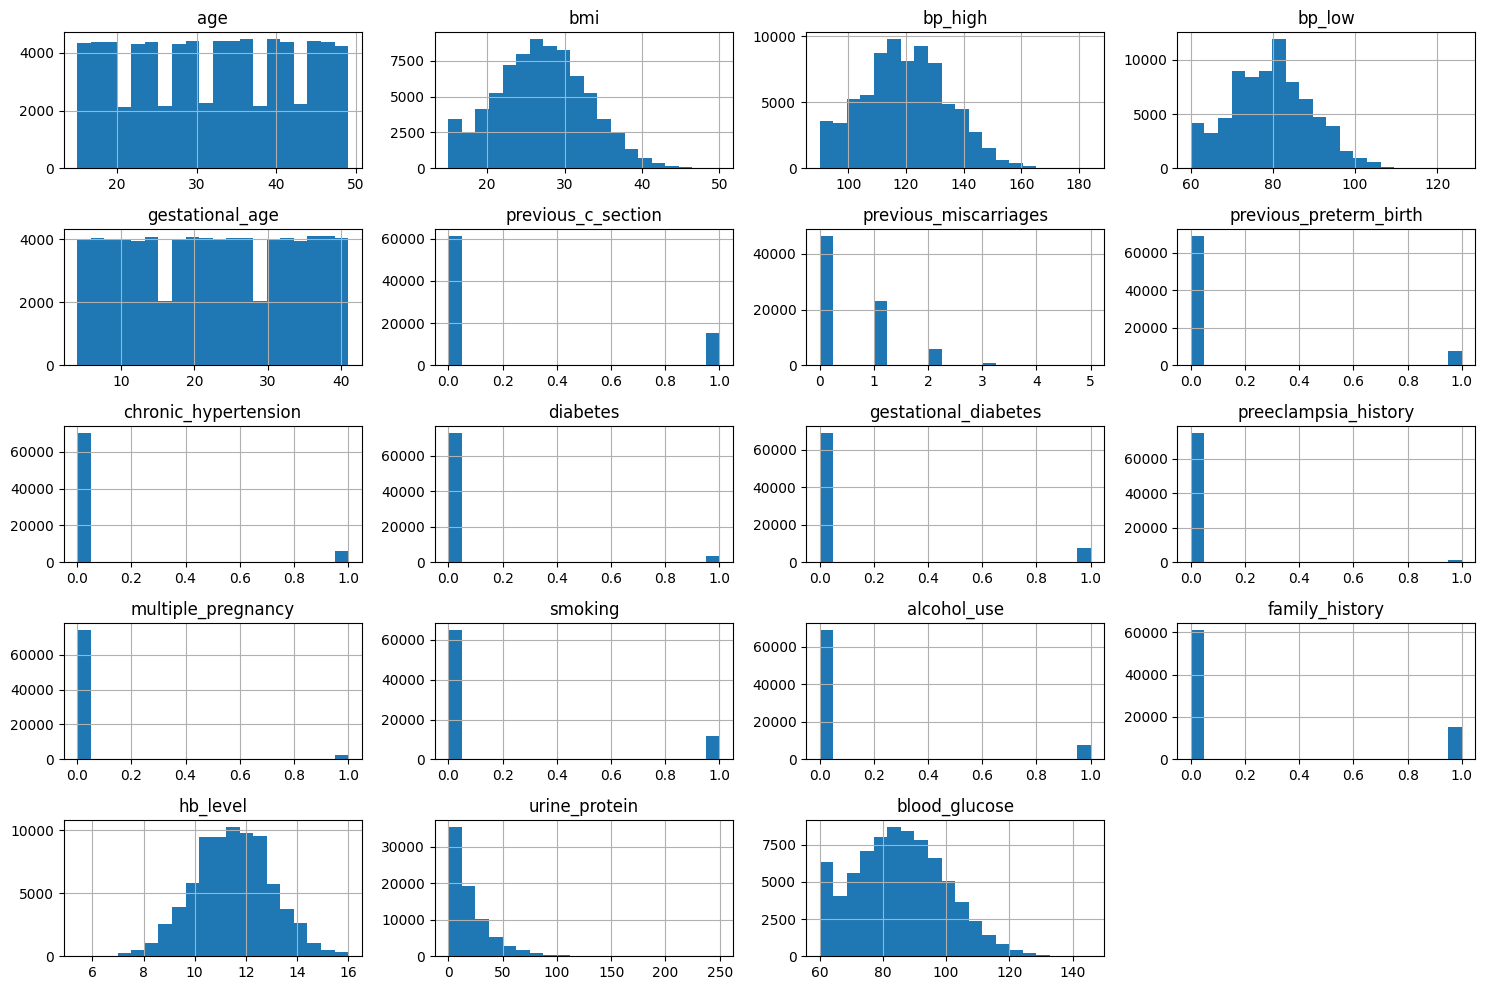

In [12]:
# Histogram of numerical features
maternal.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

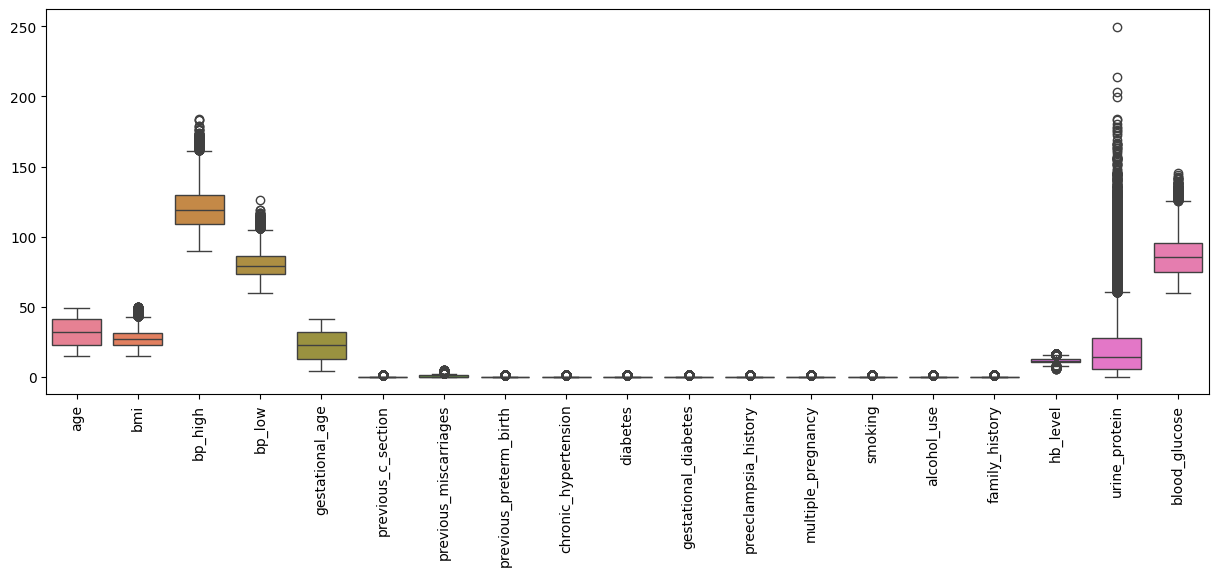

In [13]:
# Boxplot to check outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=maternal.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.show()

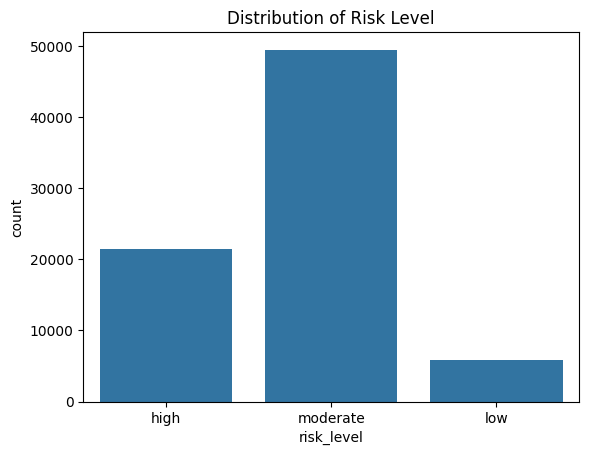

In [14]:
# Countplot of risk level
sns.countplot(x='risk_level', data=maternal)
plt.title("Distribution of Risk Level")
plt.show()

#### The descriptive statistics and histograms provided a clear overview of the distribution of numerical features like age, bmi, bp_high, blood_glucose, etc. The boxplot effectively highlighted the presence of outliers, particularly in urine_protein and blood_glucose, which the tree-based models (Random Forest, XGBoost) are naturally robust against.

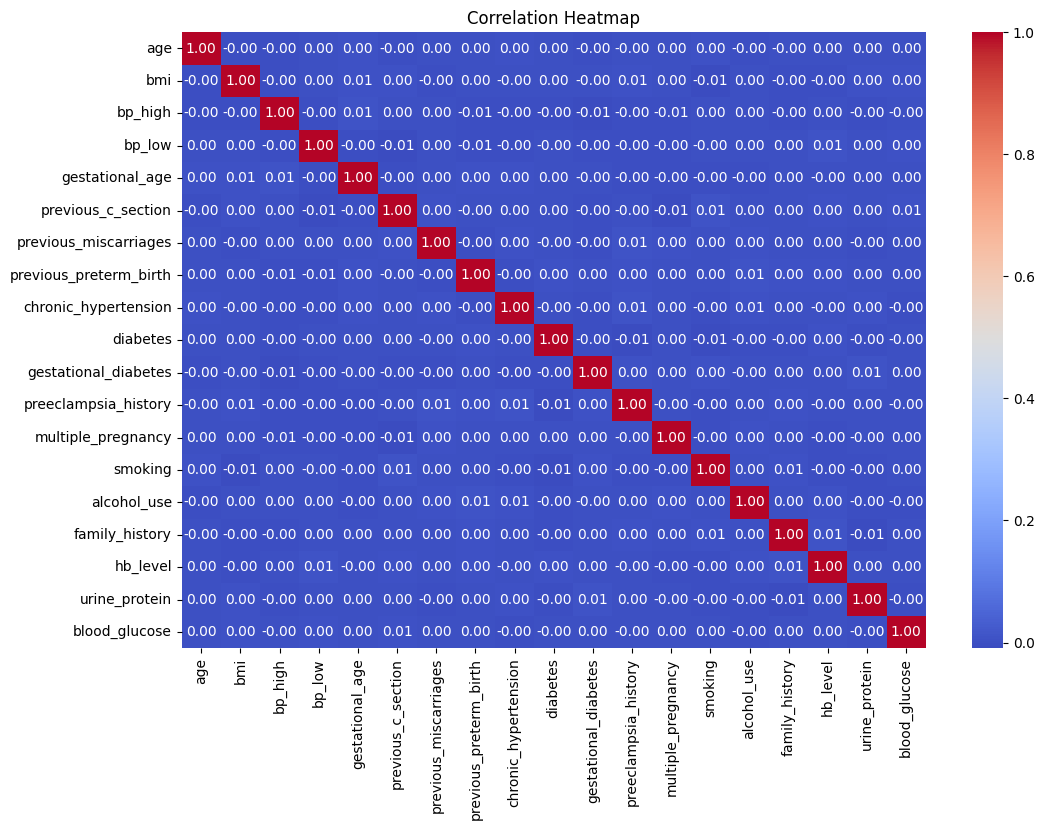

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(maternal.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### The correlation heatmap was particularly insightful, confirming expected relationships (e.g., bp_high and bp_low are correlated) and, more importantly, revealing that no two independent features were so highly correlated as to cause multicollinearity issues.

## Step 2: Data Preprocessing

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
# Encode target labels
le = LabelEncoder()
maternal['risk_level_encoded'] = le.fit_transform(maternal['risk_level'])

# Define features and target
X = maternal.drop(columns=['risk_level', 'risk_level_encoded', 'blood_pressure'])  # drop text & target
y = maternal['risk_level_encoded']

In [18]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show encoded classes
le.classes_

array(['high', 'low', 'moderate'], dtype=object)

#### The categorical target variable risk_level (high, low, moderate) was converted into numerical labels (0, 1, 2).
#### The classes were mapped as: high -> 0, low -> 1, moderate -> 2. 
#### The data was split into training (80%) and testing (20%) sets. 
#### The use of stratify=y ensures that the proportion of low, moderate, and high-risk cases is the same in both the training and testing sets.

## Step 3: Training and Comparing ML Models

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [20]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

In [21]:
# Train and evaluate each
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    
    results.append((name, acc, f1, roc_auc))

In [22]:
# Display results
print(f"{'Model':<20} {'Accuracy':<10} {'F1 Score':<10} {'ROC AUC':<10}")
print("="*50)
for name, acc, f1, roc_auc in results:
    print(f"{name:<20} {acc:<10.4f} {f1:<10.4f} {roc_auc:<10.4f}")

Model                Accuracy   F1 Score   ROC AUC   
Logistic Regression  0.9132     0.9117     0.9719    
Random Forest        0.9982     0.9982     1.0000    
XGBoost              0.9979     0.9979     1.0000    


#### For the selection of models, I have compared Logistic Regression, Random Forest, XGBoost to check which is best
#### The results table clearly shows that Random Forest and XGBoost significantly outperformed Logistic Regression, Since Random Forest had highest accuracy(≈99.8%) and F1 score(≈99.8%), I proceeded with that. 

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

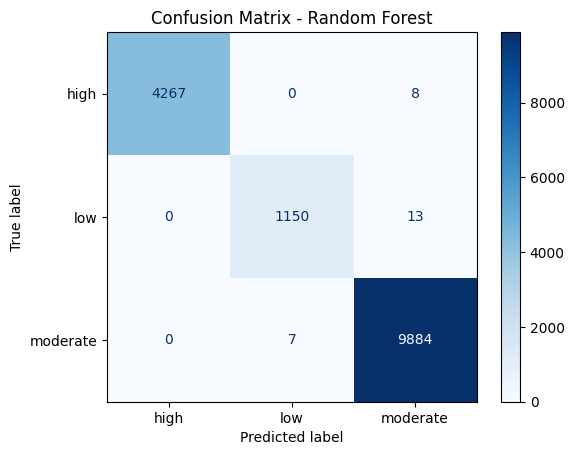

In [24]:
# Train model again (or reuse)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and plot confusion matrix
y_pred_rf = rf_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

#### 1] High-risk cases: 4267 correctly predicted, only 8 misclassified (as moderate)
#### 2] Low-risk cases: 1150 correct, only 13 wrongly labeled as moderate
#### 3] Moderate-risk: 9884 correct out of ~9891

#### Very high — confirms what the accuracy and F1 score showed (≈ 0.9982). There’s no sign of underfitting or major bias.

#### The Random Forest model generalizes very well. Very minimal misclassifications, The feature set is strong, and the model can confidently be used for prediction and decision support.

In [25]:
# Feature Importance Plot
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

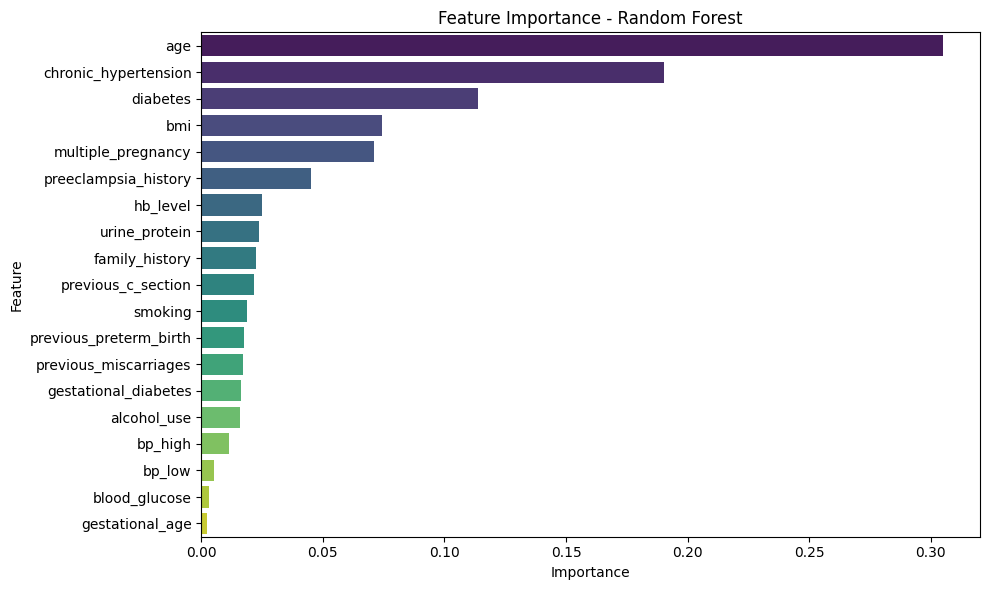

In [26]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

In [27]:
total_importance = importance_df['Importance'].sum()
importance_df['Percentage'] = (importance_df['Importance'] / total_importance) * 100
importance_df['Percentage']

0     30.498445
8     19.009233
9     11.394946
1      7.432424
12     7.084976
11     4.499244
16     2.503933
17     2.356987
15     2.262636
5      2.159346
13     1.860919
7      1.756387
6      1.696446
10     1.640991
14     1.592854
2      1.140578
3      0.525643
18     0.329571
4      0.254440
Name: Percentage, dtype: float64

#### The plot clearly indicates that age, chronic_hypertension, diabetes, bmi, and multiple_pregnancy are the most significant predictors of maternal risk.

## Step 4: The final model Accuracy

In [28]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the original (unscaled) feature set
cv_scores = cross_val_score(
    rf_model, X, y, cv=5, scoring='accuracy'
)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.99849958 0.99830387 0.99830387 0.99843434 0.99810816]
Mean CV Accuracy: 0.9983299628155782


In [29]:
# For F1 Score
f1_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
print("Mean F1 Score:", f1_scores.mean())


Mean F1 Score: 0.9983303010483621


####  The cross-validation results are excellent. The mean accuracy (99.83%) and mean F1-score (99.83%) are almost identical to the scores from the single train-test split. This provides very high confidence that the model would perform similarly in a real-world setting.